In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [17]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
X = data.loc[:,('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol')]
y = data['quality']
print("Label kelas : ", np.unique(y))

Label kelas :  [3 4 5 6 7 8]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 0.16107692 -0.21128341  0.09769112 -0.38227061  0.47891986  0.29885363
   2.63135506  0.24026625 -2.46933839  7.8006504  -0.58477711]
 [-0.18364134 -1.94309115  0.50849482 -1.16269634 -0.81755718  1.92457668
   1.90153985 -3.5387314  -2.72850951 -1.28736344  2.13737311]
 [-0.87307788  0.79428237 -1.39147228 -0.45321841 -0.1586918   0.58574593
  -0.22708785  0.13956364  0.57592232  0.48302886 -0.67864436]
 [ 1.02287259 -1.21684919  0.4057939  -0.66606179 -0.26496041 -0.65745405
  -0.56158649 -0.01414033 -0.46076217  1.01414655  0.72936437]
 [-0.58581266 -0.43474247  0.45714436  2.38469332 -0.28621413 -0.37056175
   1.23254257  0.55827446  0.12237286  1.01414655  0.07229363]]
y Training: 92      5
1017    6
1447    5
838     7
40      5
Name: quality, dtype: int64


In [12]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [13]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 1.43118378e-01  9.24393557e-02 -7.43000164e-02 -1.91459117e-02
   1.11228385e-01  3.47621013e-02 -1.02926543e-01  1.86661960e-02
   2.49216001e-02 -7.89932621e-02 -1.61138295e-02]
 [ 5.66122150e-04  1.85541238e-03  8.71375585e-04  6.29787391e-05
   8.20822322e-04  4.74207656e-03 -1.03302658e-02  4.29585822e-04
   8.64166883e-04  8.86903803e-04 -6.65789693e-04]
 [ 1.02989939e-01  3.31785642e-01 -1.08289761e-01  2.91744908e-02
   1.48569870e-01  7.70026767e-02 -1.28233341e-01  2.33768015e-02
   1.19769675e-01 -3.33223321e-03  5.14733550e-03]
 [ 6.61228962e-02  6.46022067e-01 -4.46165248e-02 -1.45119578e-01
   2.95296128e-01 -4.47564391e-03  2.62611243e-02  1.15544217e-01
   6.93400302e-02 -9.90624168e-02 -2.44984881e-01]
 [ 6.55909572e-02  2.51105763e-01 -1.46221386e-01 -2.95277773e-02
   1.81613231e-01  2.09245368e-01  8.14084732e-02  2.21268349e-01
   2.35233712e-01 -4.72127363e-02 -2.60595279e-01]
 [ 2.90854239e-04  4.71208848e-05 -1.39367528e-06  1.36556859e-04


In [14]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

[6 5 7 5 6 5 5 6 5 5 5 5 6 5 5 6 7 6 6 5 6 5 6 7 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 7 7 6 5 5 6 5 6 5 5 6 7 6 5 5 5 7 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 5 6 5 5 5 6 6 5 6 6 5 5 7 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 5 5 6 7 5 5 6 6 5 5 6 6 7 5 6 5 6 5 6 5 5 5 6 6 6 7
 6 5 6 6 5 6 6 5 5 5 6 6 6 5 7 5 6 5 6 7 5 6 6 5 5 7 6 6 7 7 6 5 5 7 5 6 7
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 5 6 5 5 6 6 6 5 5 6
 6 6 5 6 6 6 5 5 5 6 5 6 6 6 6 7 7 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 5 5 7 5 5 5 5 5 5 6 6 6 6 5 6 6 6 6 5 7 6 5 7 6 6 6 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 6 6 5 5 5 7 6 6 5 6 5 6 6 6 5 5 7 5 5 5 7 5 5
 6 5 6 6 5 5 5 5 5 5 6 6 5 5 5 5 7 6 6 5 6 7 5 6 6 6 6 5 6 5 6 6 5 5 6 5 5
 6 6 5 6 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 5 7 5 5 6 5 6 5 6 6 5 5 5 5 5 6 5 6
 6 5 6 5 5 5 6 6 5 6 5 5 6 6 6 6 6 5 6 5 6 5 5 5 6 5 6 6 7 6 7 5 5 6 5 6 5
 6 5 5 7 5 5 6 5 6 7 6 5 6 5 6 5 5 7 5 5 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5]


Akurasi : 61.25000000000001 %


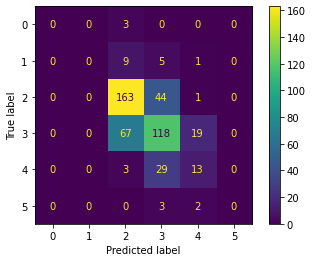

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))